<h1 style="text-align: center; background-color:#E9F7EF; font-family:Arial; color:#526085">ĐỒ ÁN THỰC HÀNH</h1>
<h2>I. Đặt và trả lời câu hỏi</h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme()

# remove warnings
import warnings
warnings.simplefilter('ignore')

# Data vislization using plolty graph object(go)
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import iplot
import plotly.io as pio
import plotly.express as px

In [2]:
df= pd.read_csv('Airline_Delay_Cause.csv')
df.head(5)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,7,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",33.0,2.0,0.92,1.00,...,0.0,0.00,0.0,0.0,129.0,98.0,23.0,8.0,0.0,0.0
1,2022,7,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",78.0,25.0,11.80,0.72,...,0.0,7.48,0.0,0.0,1664.0,887.0,52.0,224.0,0.0,501.0
2,2022,7,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",124.0,19.0,5.84,1.00,...,0.0,5.40,5.0,4.0,1523.0,388.0,35.0,511.0,0.0,589.0
3,2022,7,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",67.0,10.0,1.32,1.00,...,1.0,4.28,0.0,1.0,657.0,103.0,82.0,93.0,25.0,354.0
4,2022,7,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",174.0,30.0,18.10,5.75,...,0.0,2.55,1.0,0.0,2462.0,1686.0,310.0,139.0,0.0,327.0


<h3>Câu 1. Số lượng chuyến bay, số chuyến bị delay và bị hủy mỗi năm thay đổi như thế nào (Xét theo nửa đầu và cuối mỗi năm)?
</h3>


In [3]:
def period(month):
    if month <= 6:
        return 1 # đầu năm
    else:
        return 2 # cuối năm

df_year = df[['year','month','arr_flights','arr_del15', 'arr_cancelled']]
df_year['Period'] = df_year['month'].apply(period)
df_year = df_year[(df_year['year'] != 2022) | (df_year['month'] < 7)]

In [4]:
df_year

,year,month,arr_flights,arr_del15,arr_cancelled,Period
1680,2022,6,133.0,14.0,3.0,1
1681,2022,6,89.0,15.0,1.0,1
1682,2022,6,120.0,12.0,5.0,1
1683,2022,6,78.0,15.0,1.0,1
1684,2022,6,176.0,22.0,3.0,1
...,...,...,...,...,...,...
101310,2017,1,1576.0,484.0,34.0,1
101311,2017,1,2914.0,522.0,75.0,1
101312,2017,1,2390.0,447.0,29.0,1
101313,2017,1,404.0,74.0,6.0,1


In [5]:
def period_year(year, per):
    return str(int(year)) + '/' + str(int(per)) # đầu năm
    return 2 # cuối năm
    
df0 = df[['year', 'arr_flights']].groupby(['year']).sum().sort_index().reset_index()

df1 = df_year.groupby(['year', 'Period'], as_index = False).sum().sort_index()
df1 = df1.rename(columns = {'arr_del15':"Trễ chuyến", 'arr_cancelled': "Hủy chuyến", 'arr_flights': 'Tổng số chuyến'})
# df1['year period'] = df1.apply(lambda x: period_year(x['year'], x['Period']), axis=1)
df1['year period'] = df1.apply(lambda x: period_year(x['year'], x['Period']), axis=1)
df1.head()

,year,Period,month,Tổng số chuyến,Trễ chuyến,Hủy chuyến,year period
0,2017,1,21913,2798209.0,550143.0,40541.0,2017/1
1,2017,2,59811,2876412.0,479331.0,42152.0,2017/2
2,2018,1,26130,2843312.0,519265.0,44292.0,2018/1
3,2018,2,92642,3462382.0,660166.0,43547.0,2018/2
4,2019,1,36362,3634338.0,719135.0,85272.0,2019/1


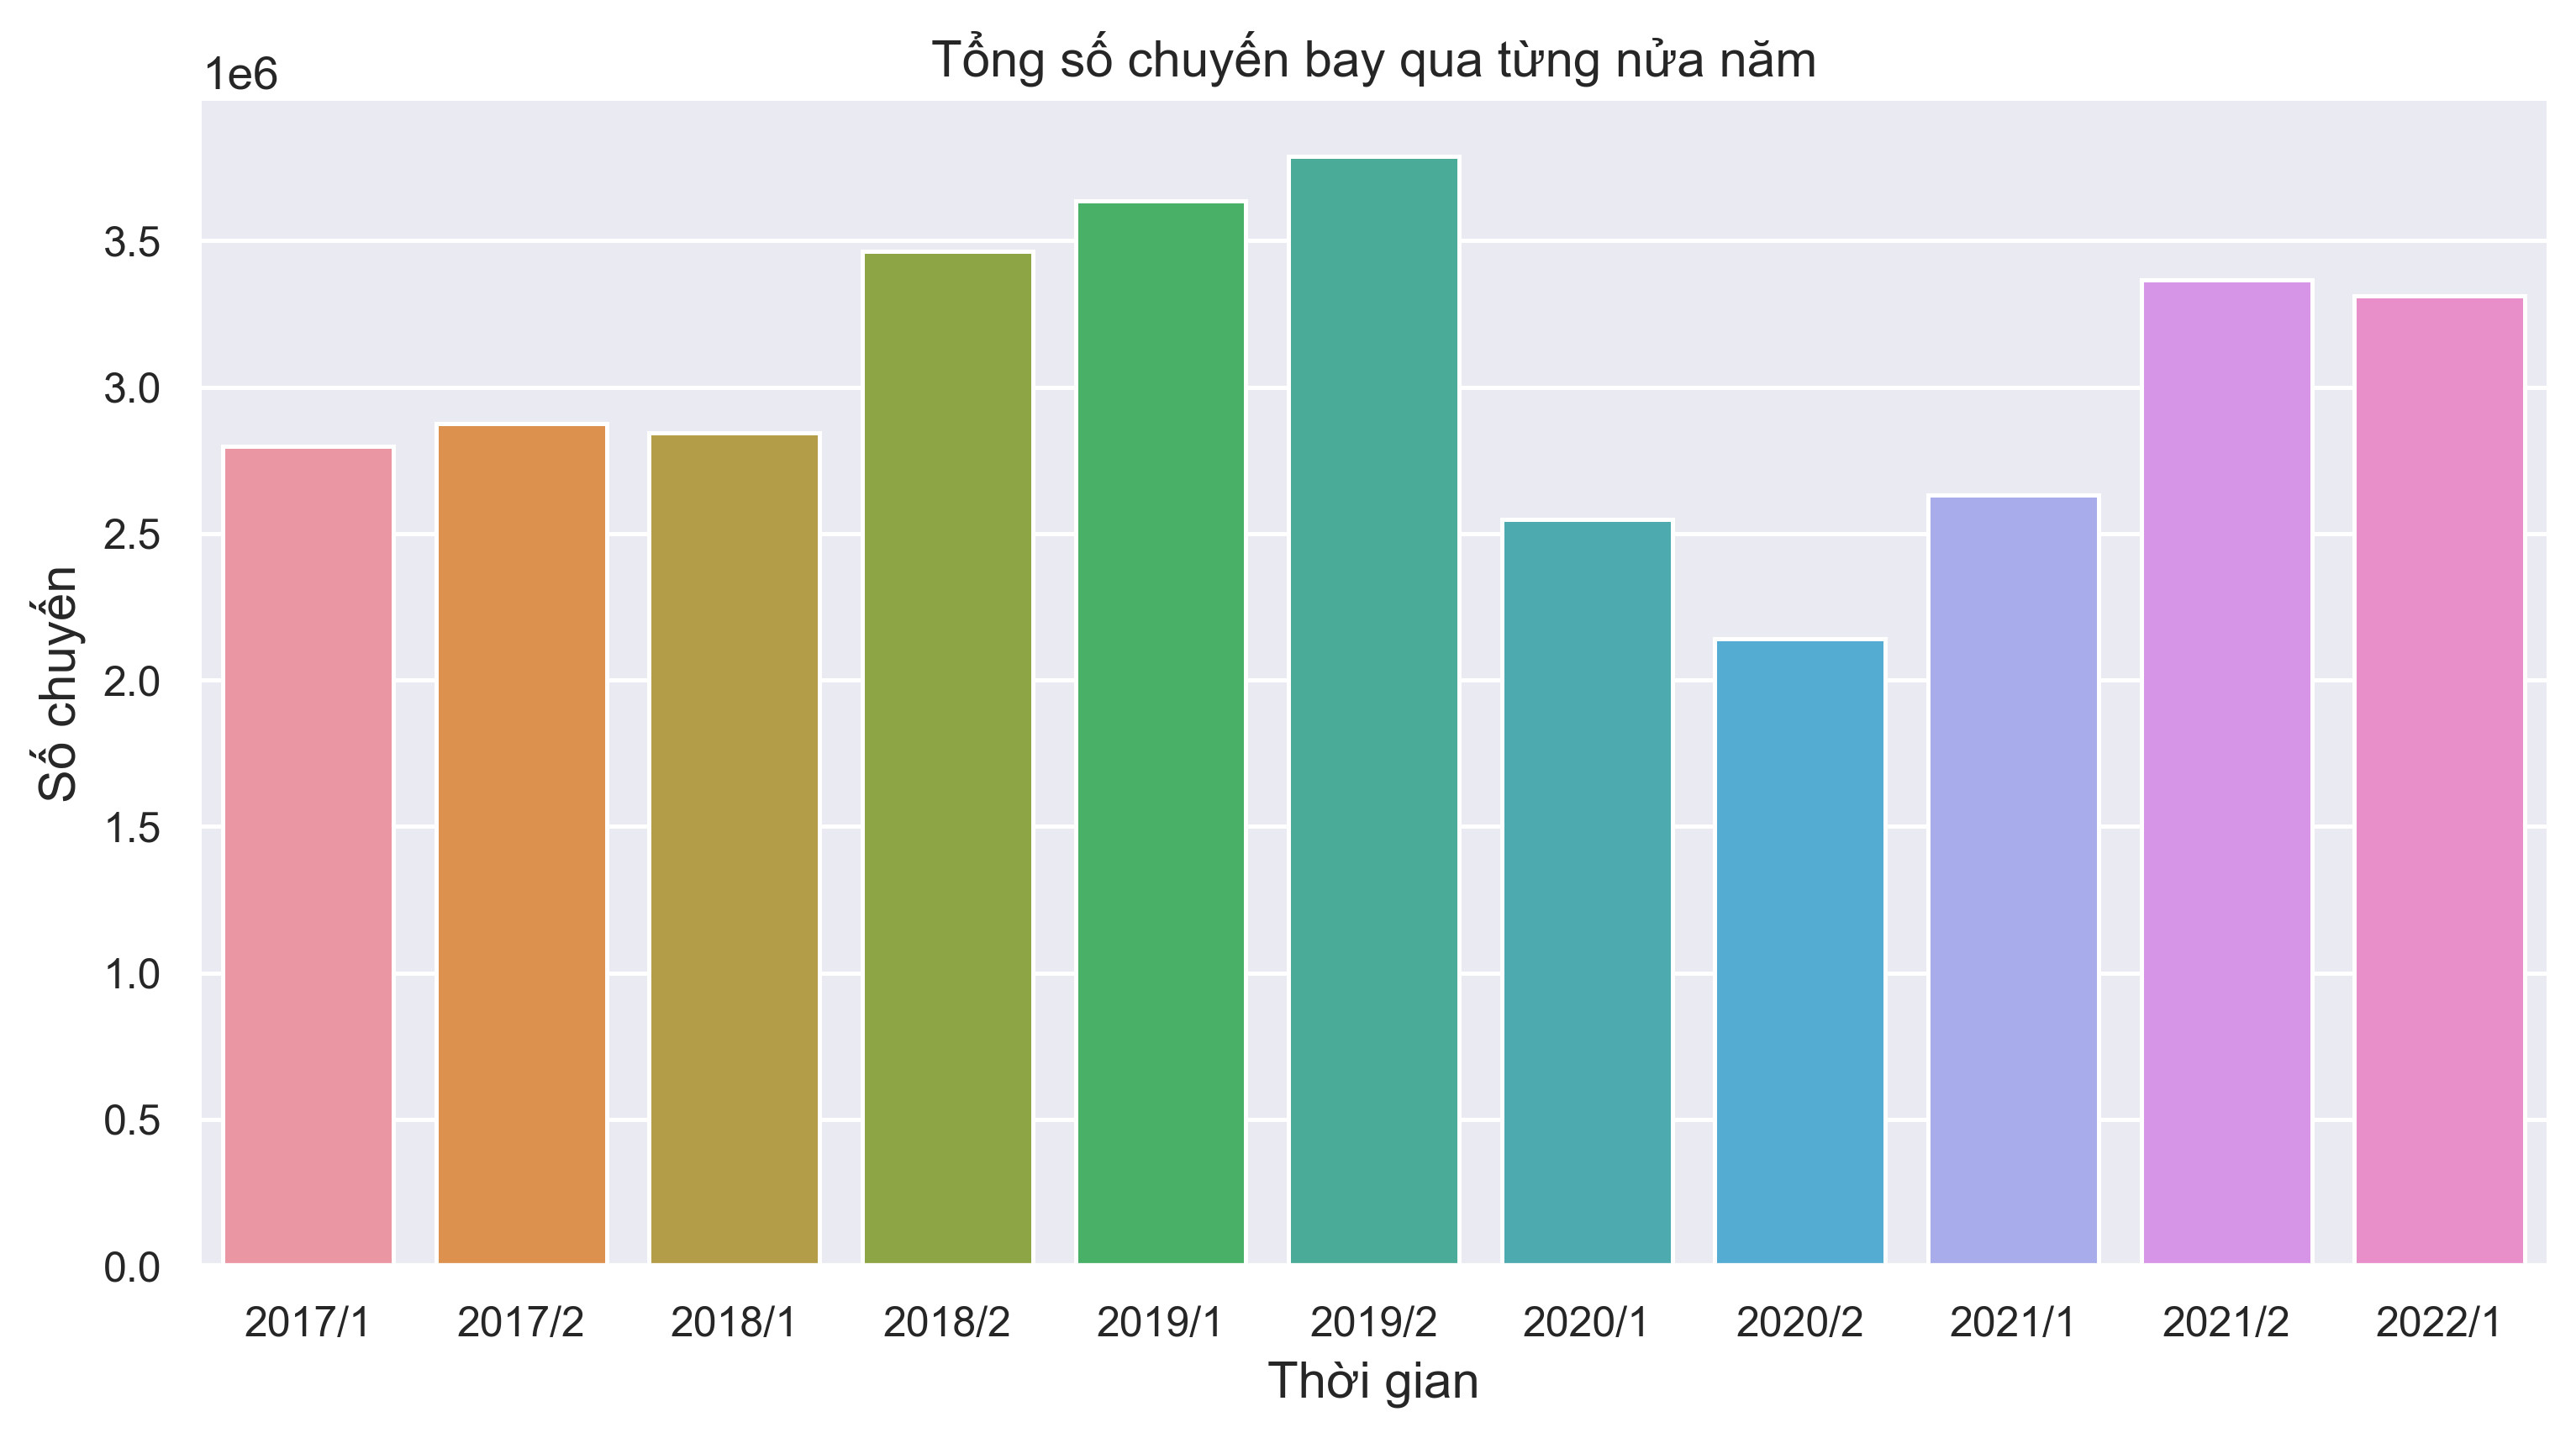

In [6]:
plt.rcParams['figure.dpi'] = 360
plt.subplots(figsize=(10,5))
ax0 =  sns.barplot(data = df1, x = 'year period', y = 'Tổng số chuyến')
plt.xlabel('Thời gian', size=12)
plt.ylabel('Số chuyến', size=12)
plt.title('Tổng số chuyến bay qua từng nửa năm', size=12)
plt.xticks(size=10)
plt.yticks(size=10)
sns.despine(left=True);

<h3>Nhận xét: </h3>

Khi xét tổng số chuyến bay trong mỗi nửa năm:
- Từ nửa đầu năm 2018 về trước và nửa sau năm 2021 về sau, số lượng chuyến bay giữ số lượng ổn định.

- Số chuyến tăng mạnh từ nửa cuối 2018, tăng liên tục đến nửa sau 2019. Đây là thời kì hàng không Mỹ phát triển nhất.

- Sau đó từ 2020 số chuyến giảm mạnh. Đây là thời điểm dịch Covid bùng nổ, đường hàng không bị hạn chế do ảnh hưởng của dịch bệnh.
- Nửa sau 2021, số chuyến tăng lại và khá ổn định, tuy vậy số lượng vẫn thấp hơn so với ngay trước dịch bệnh.

=> Covid 19 ảnh hưởng nhiều đến hàng không, hiện tại tình hình dịch bệnh được kiểm soát, tình hình đường hàng không dần ổn định, nhưng vẫn chưa đạt được giá trị cao như ngay trước dịch.

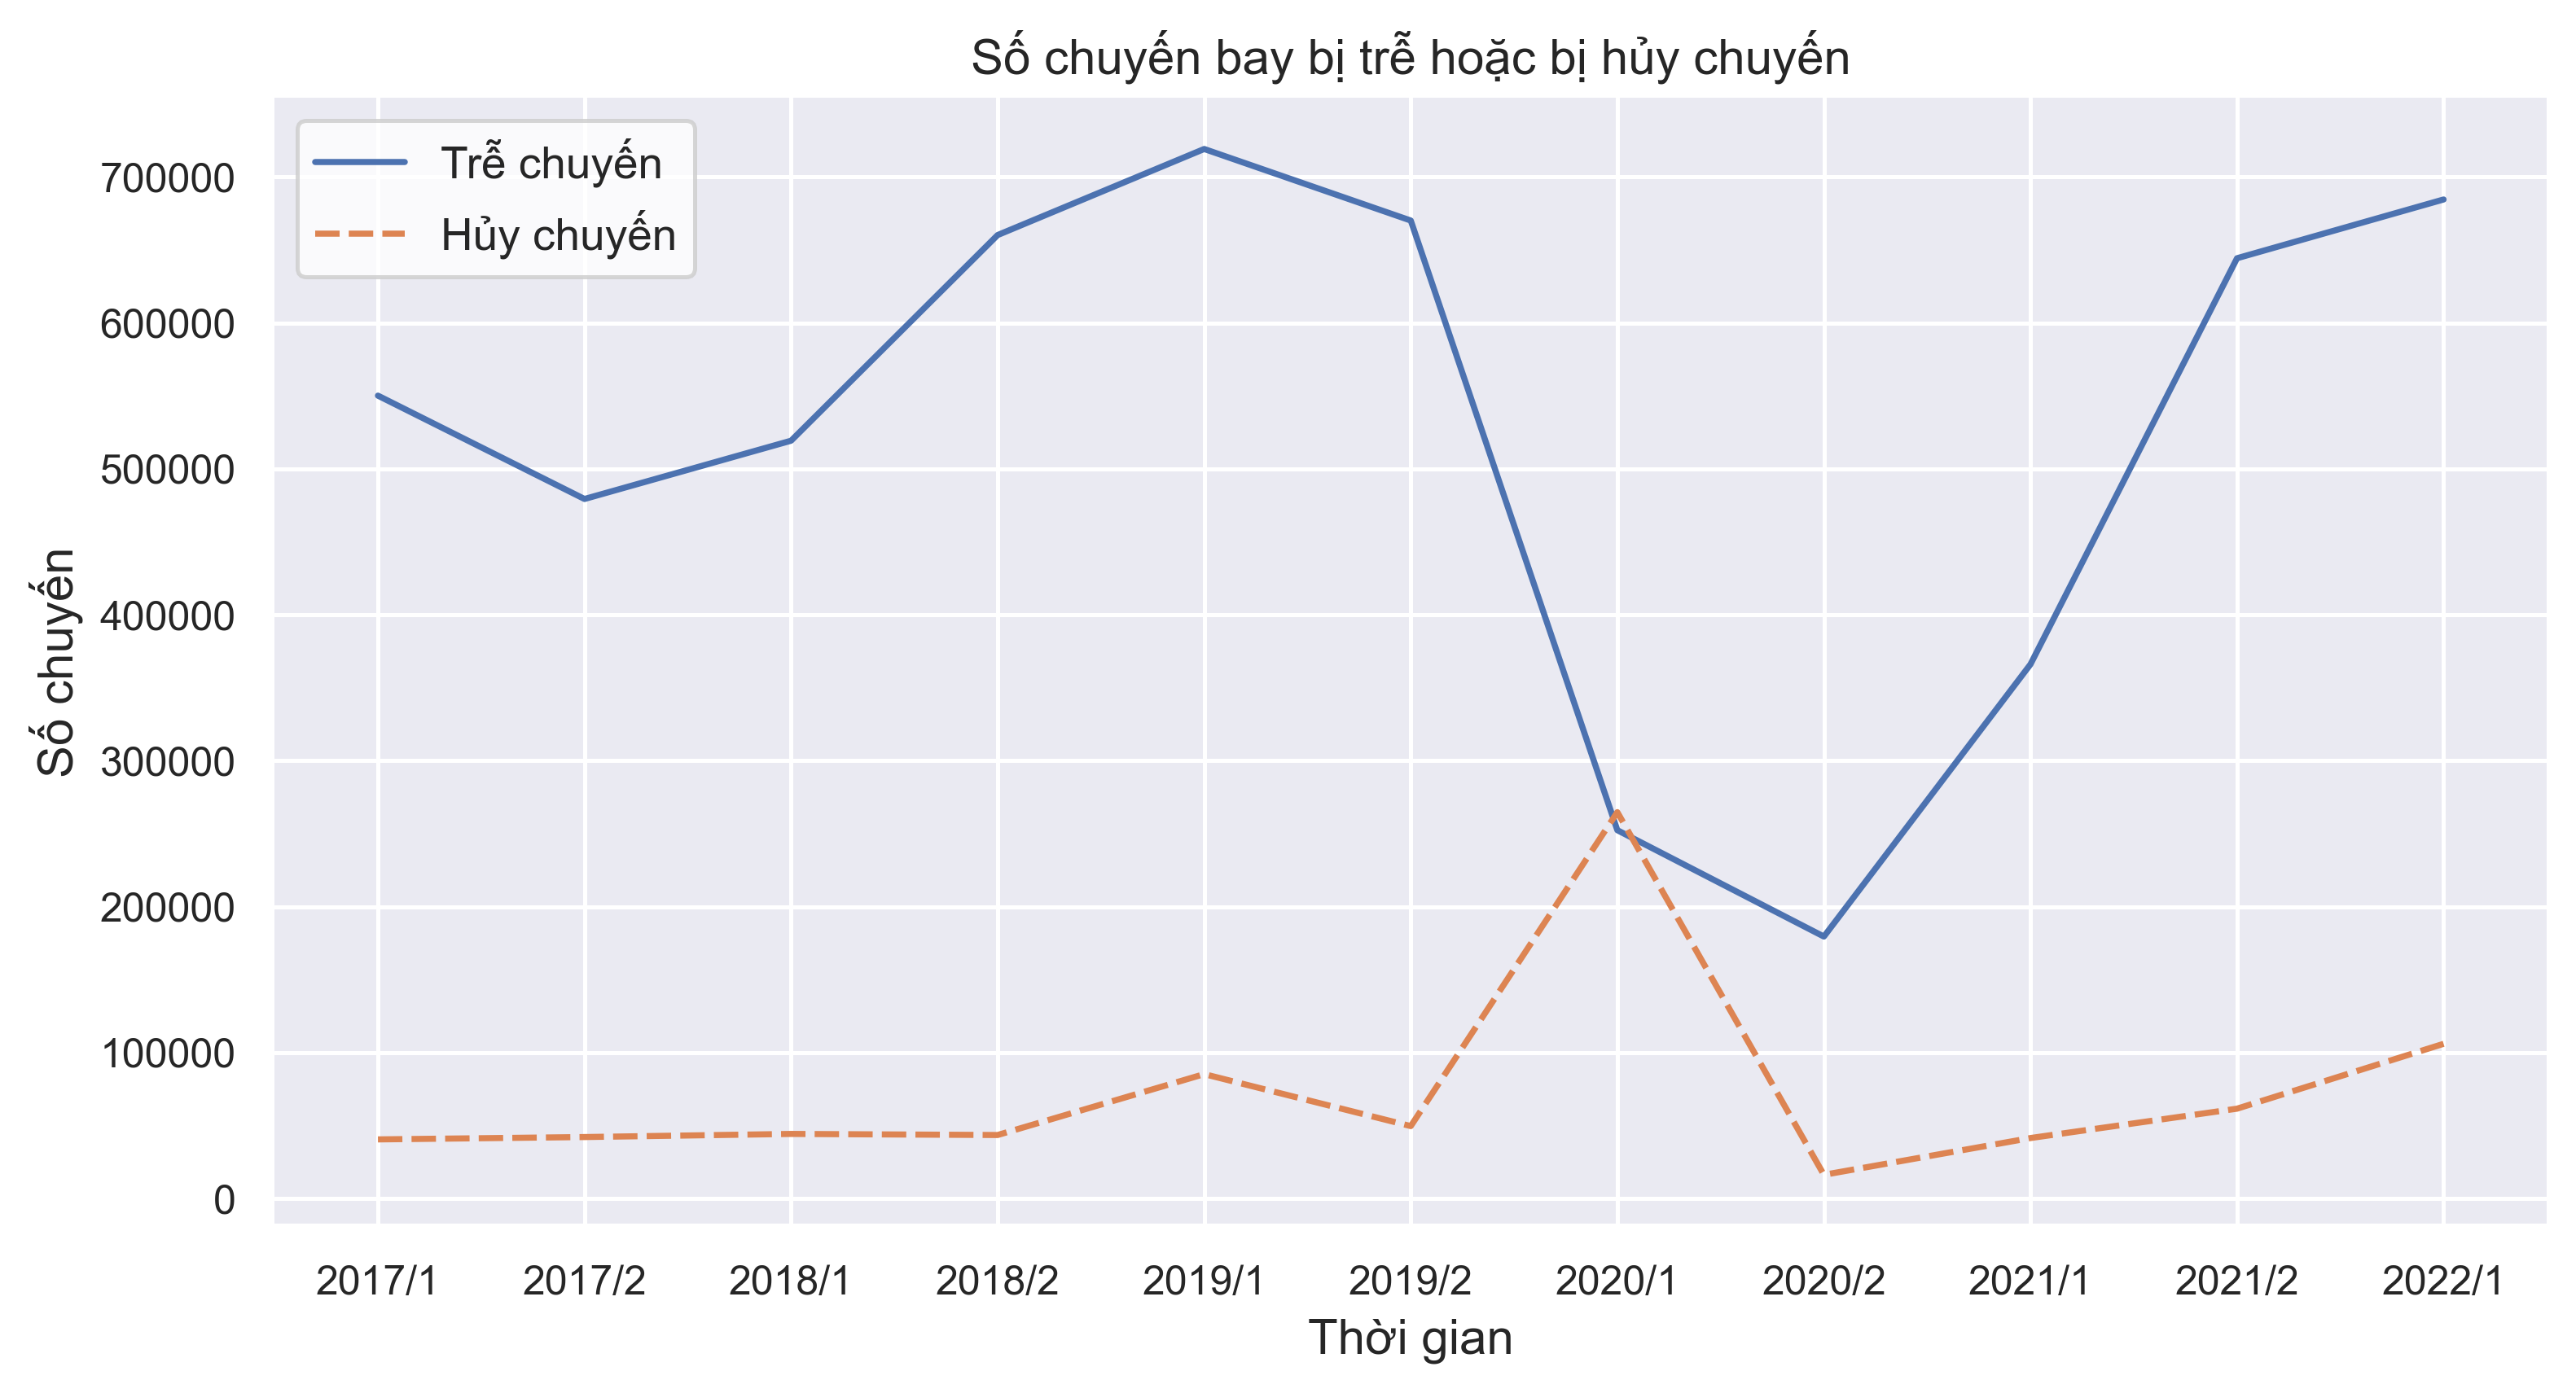

In [7]:
plt.rcParams['figure.dpi'] = 360
plt.subplots(figsize=(10,5))
sns.set(rc={'axes.facecolor':'#FFFFFF', "grid.color": ".9"})
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})
df_period_of_year = df1[['Trễ chuyến','Hủy chuyến','year period']].set_index('year period')

ax1 = sns.lineplot(data = df_period_of_year)

plt.xlabel('Thời gian', size=12)
plt.ylabel('Số chuyến', size=12)
plt.title('Số chuyến bay bị trễ hoặc bị hủy chuyến', size=12)
plt.xticks(size=10)
plt.yticks(size=10)
sns.despine(left=True);

<h3>Nhận xét:</h3>

- Có thể nhận thấy xu hướng tương đồng giữa số chuyến bị hủy, với tổng số chuyến (tăng vào 2018/2, giảm vào thời kì covid, dần cải thiện sau đó).

- Ngược lại, nhìn chung, số lượng chuyến bay bị hủy không có sự biến đổi nhiều, duy trì ở mức 50.000 chuyến/nửa năm. Chir có đặc biệt vào năm 2020, số chuyến bị hủy tăng lên gấp 3 lần, dễ hiểu do ảnh hưởng dịch bệnh.
- Sau khi hết dịch, số chuyến hủy trở lại giá trị như trước dịch, dù vậy nó đang có xu hướng tăng lên: đến nửa đầu 2022 gấp 2 lần giá trị trung bình được đo trước khi dịch covid bùng nổ.

<h3>2. Thời gian nào trong năm thường xảy ra trễ chuyến bay?</h3>

<h3>3. Bình quân mỗi chuyến bay phải đợi bao nhiêu phút?
Liệu các hãng bay có cải thiện vấn đề trễ chuyến tốt hơn chưa?
Xét qua các năm và vẽ biểu đồ line để kiểm tra. </h3>

### Lợi ích khi trả lời câu hỏi: 
- Cho thấy thời gian trung bình mà mỗi hành khách phải chờ nếu có sự cố trễ chuyến bay, từ đó giúp khách hàng chủ động lường trước được rủi ro về thời gian, lựa chọn hãng hàng không uy tín và có phương án dự phòng phù hợp.
- Cho thấy xu hướng thời gian chờ qua các năm, từ đó góp phần đánh giá sự nỗ lực của hãng hàng không trong việc cải thiện vấn đề trễ chuyến bay.

<h5> B1: Tạo dataframe df_delay và tính toán thời gian trung bình phải chờ ở mỗi chuyến bay, dựa trên từng năm và từng hãng hàng không </h5>

In [8]:
df_delay = df[['year', 'carrier', 'carrier_name', 'arr_flights','arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']]
df_delay = df_delay.groupby(['year', 'carrier']).sum().sort_index().reset_index()

# Tính thời gian trung bình phải đợi = tổng thời gian delay / tổng số chuyến bay
df_delay['average_waiting'] = (df_delay['arr_delay'] + df_delay['carrier_delay'] + df_delay['weather_delay'] + df_delay['nas_delay'] + df_delay['security_delay'] + df_delay['late_aircraft_delay']) / (df_delay['arr_flights'])
df_delay

,year,carrier,arr_flights,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,average_waiting
0,2017,AA,896348.0,9768952.0,3199178.0,408019.0,2571151.0,23134.0,3567470.0,21.797231
1,2017,AS,185068.0,1454555.0,393069.0,55032.0,521631.0,7665.0,477158.0,15.719141
2,2017,B6,298654.0,5540779.0,1580868.0,126445.0,1467288.0,12267.0,2353911.0,37.105004
3,2017,DL,923560.0,8782255.0,3284966.0,729842.0,2312681.0,8343.0,2446423.0,19.018266
4,2017,EV,339541.0,5407415.0,2120692.0,97604.0,1325476.0,0.0,1863643.0,31.851323
...,...,...,...,...,...,...,...,...,...,...
93,2022,QX,56320.0,457605.0,176114.0,16190.0,70139.0,1743.0,193419.0,16.250178
94,2022,UA,352009.0,5010712.0,1729446.0,232234.0,984119.0,450.0,2064463.0,28.469227
95,2022,WN,731925.0,8999978.0,3177182.0,165268.0,1206790.0,25433.0,4425305.0,24.592624
96,2022,YV,72001.0,1200993.0,595585.0,92246.0,149796.0,1158.0,362208.0,33.360453


<h5> B2: Chọn ra: <br>
+ 3 hãng hàng không có tổng thời gian chờ trung bình qua các năm là lớn nhất <br>
+ 3 hãng hàng không có tổng thời gian chờ trung bình qua các năm là nhỏ nhất <br>
và lưu vào danh sách carriers. </h5>

In [9]:
cariers_df = df_delay.groupby(['carrier']).sum()['average_waiting'].sort_values()
h3 = cariers_df.head(3).index.to_list()
t3 = cariers_df.tail(3).index.to_list()

carriers = []
for carrier in h3:
    carriers.append(carrier)
for carrier in t3:
    carriers.append(carrier)
print(carriers)

['QX', 'VX', 'HA', 'G4', 'F9', 'B6']


<h5> B3: Tạo dataframe waiting_each_year_df chứa thời gian chờ trung bình ở mỗi chuyến bay. 

Dataframe này có hàng là các năm, cột là 6 hãng hàng không trong carriers. </h5>

In [10]:
# Lấy dữ liệu năm, hãng hàng không và thời gian chờ trung bình
df_delay = df_delay[['year', 'carrier', 'average_waiting']]
# Lấy ra danh sách các năm làm hàng của dataframe (2017 - 2022)
list_years = df_delay['year'].drop_duplicates().sort_values().to_list()

# hàm trả về thời gian chờ từ 2017-2022 khi biết mã hãng hàng không
def count_by_year(carrier):
    time = []
    sort_carrier = df_delay[df_delay['carrier'] == carrier]
    
    for year in list_years:
        a = sort_carrier[sort_carrier['year'] == year]['average_waiting'].to_list()
        if len(a) != 0:
            time.append(a[0])
        else:
            time.append(np.nan)

    return time

# list_time chứa thời gian chờ từ 2017-2022 ứng với từng hãng hàng không
list_time = []
for carrier in carriers:
    list_time.append(count_by_year(carrier))

list_carriers = dict(zip(carriers, list_time))

# Tạo dataframe từ list_carriers và index lấy từ list_years
waiting_each_year_df = pd.DataFrame(list_carriers, index = list_years)
waiting_each_year_df

,QX,VX,HA,G4,F9,B6
2017,NaN,33.351714,9.668588,NaN,28.148718,37.105004
2018,NaN,21.035654,9.273915,32.545162,41.728812,36.695138
2019,NaN,NaN,9.190974,28.597616,34.255284,40.517096
2020,NaN,NaN,5.921413,21.171522,12.641733,14.637945
2021,12.401870,NaN,8.218988,38.582926,29.693077,37.062693
2022,16.250178,NaN,14.270729,45.968736,44.267800,51.930137


<h5> B4: Vẽ line chart. </h5>

Text(0.5, 1.0, 'Thời gian chờ trung bình khi trễ chuyến bay của các hãng hàng không')

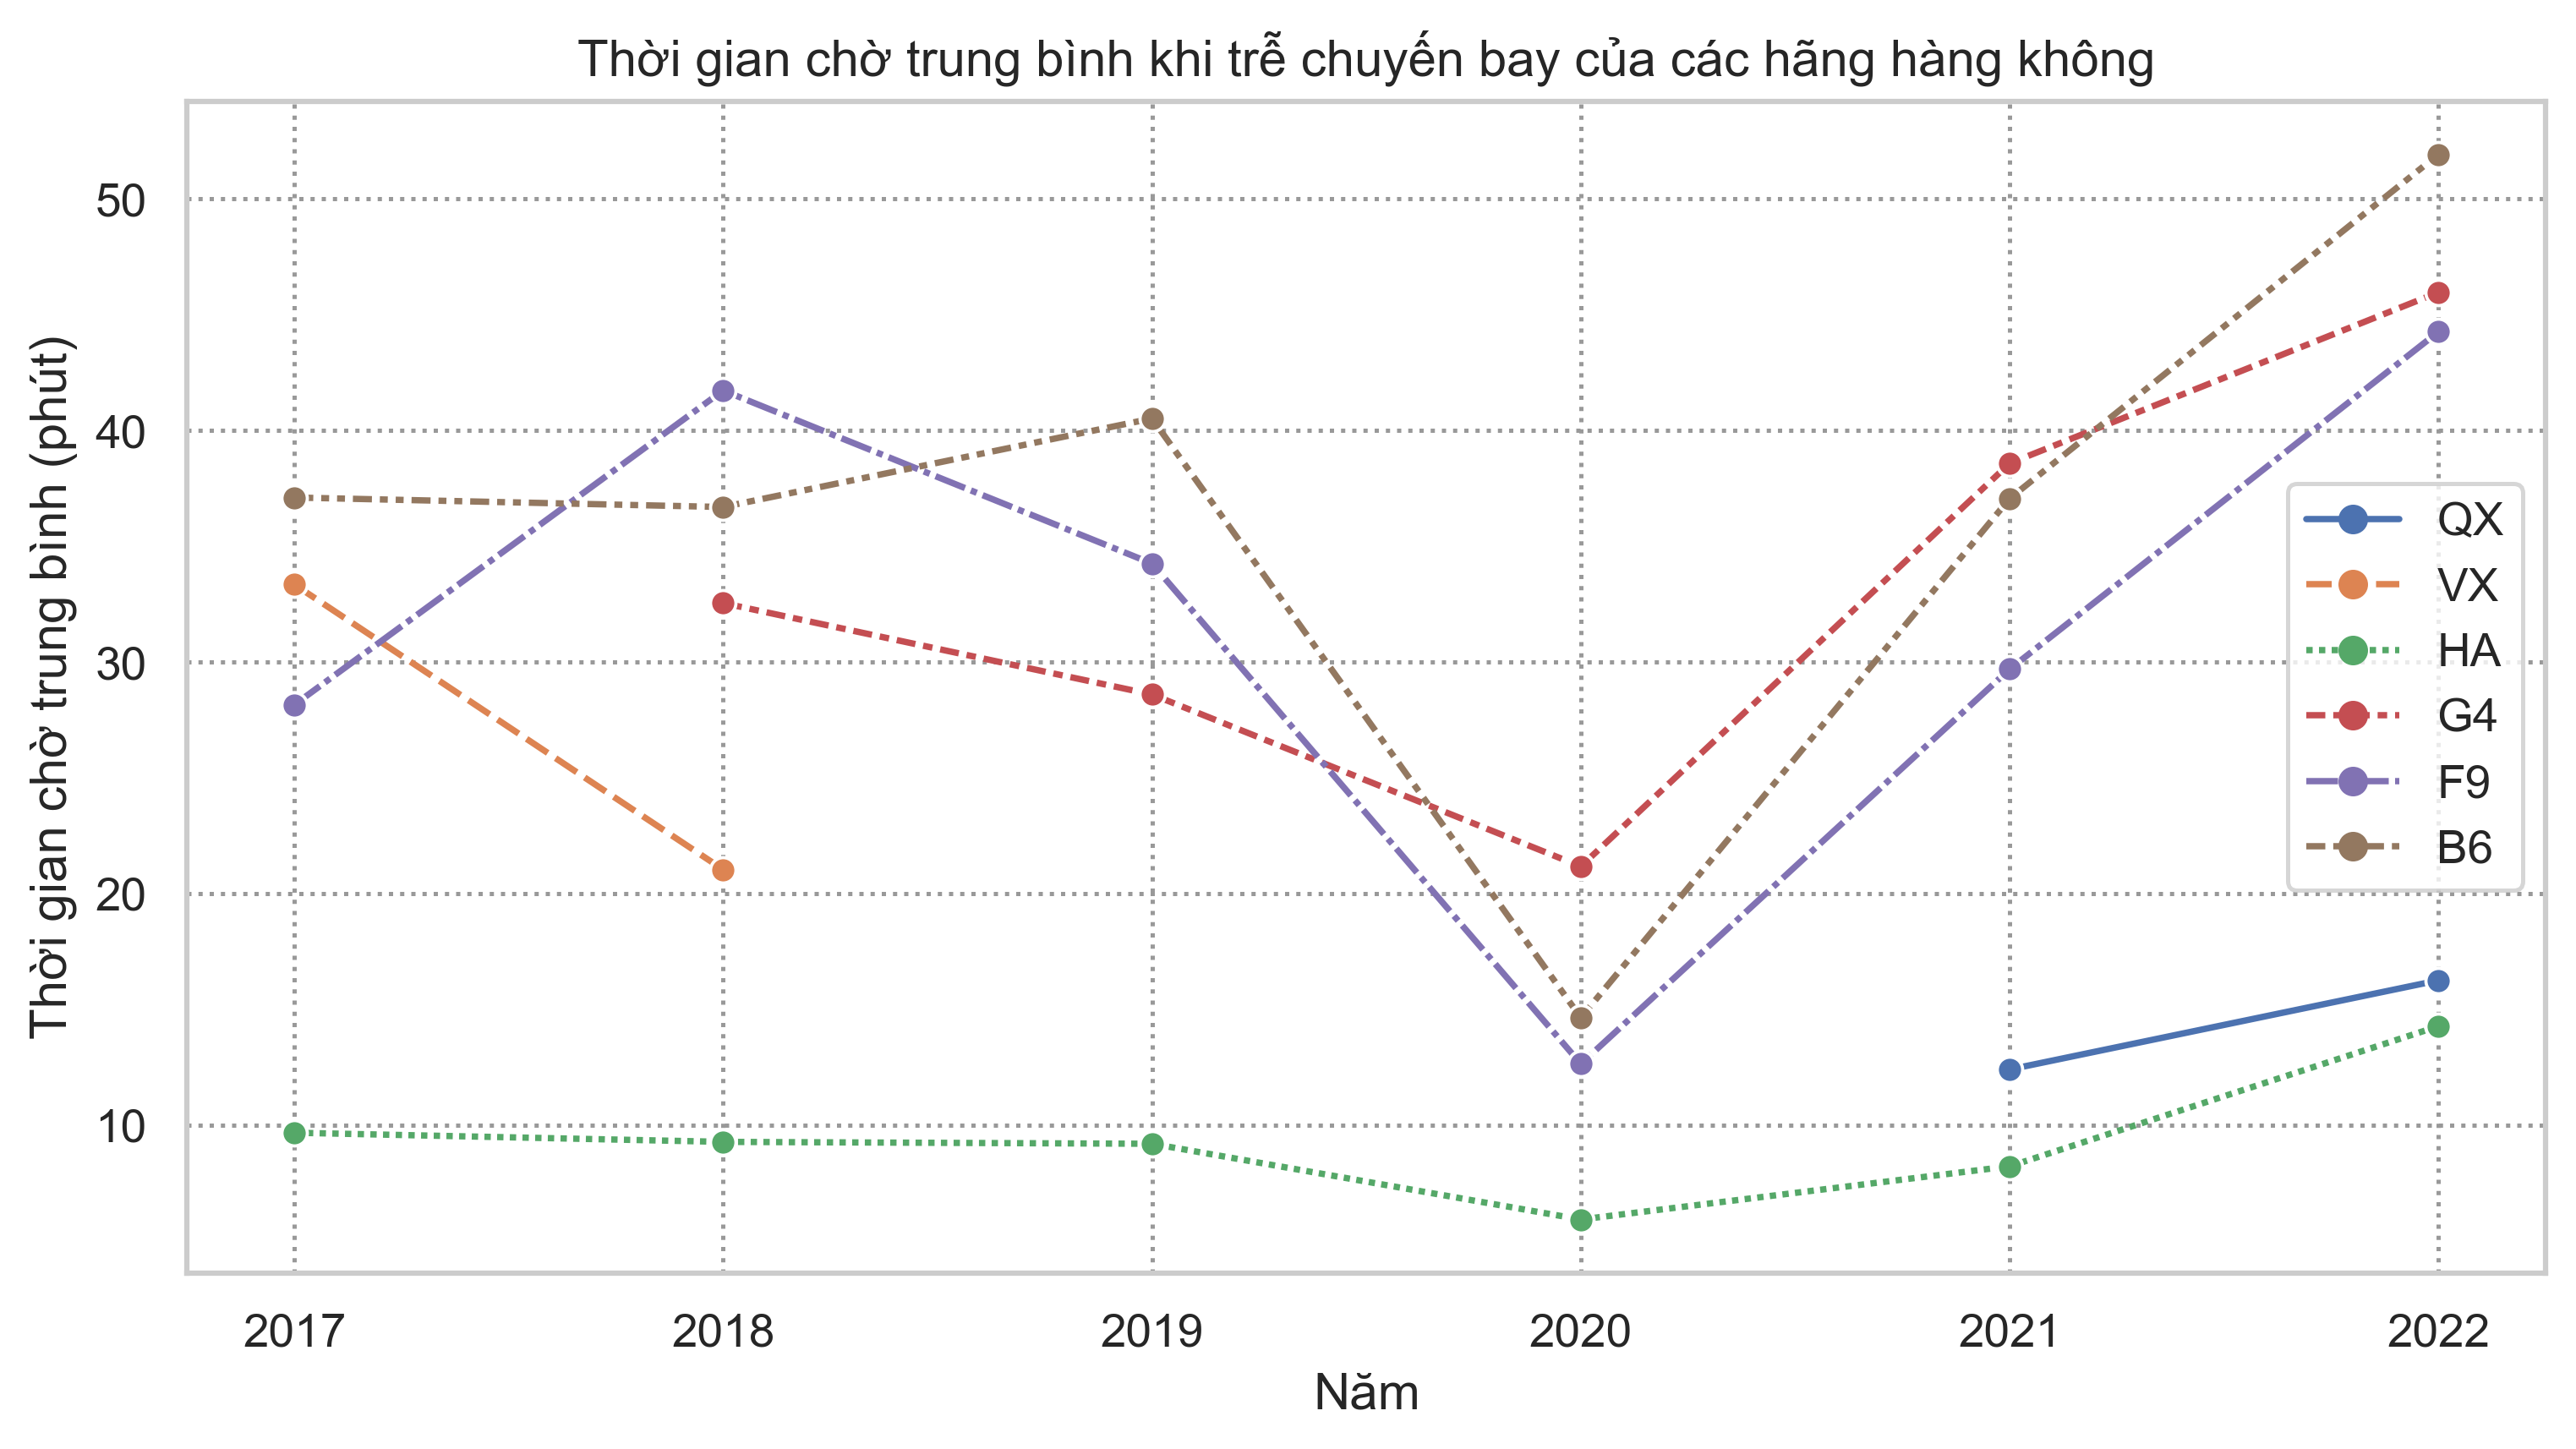

In [11]:
plt.rcParams['figure.dpi'] = 360
plt.subplots(figsize = (10,5))
ax3 =  sns.lineplot(data = waiting_each_year_df, markers = 'o')
plt.xlabel('Năm', size = 12)
plt.ylabel('Thời gian chờ trung bình (phút)', size = 12)
plt.title('Thời gian chờ trung bình khi trễ chuyến bay của các hãng hàng không', size=12)

<h3>Nhận xét:</h3>

- Nhìn chung, xu hướng của thời gian chờ trung bình (TGCTB) ở các chuyến bay của các hãng bất ổn định trong giai đoạn 2017-2019, giảm mạnh từ 2019-2020 và cũng tăng rất nhanh 1 năm sau đó - 2021, dần dần ổn định và tăng nhanh cho đến 2022. Sự bất ổn định từ 2019-2021 có thể là do sự ảnh hưởng từ đại dịch Covid-19. Trường hợp nhiễm Covid-19 đầu tiên được công bố tại Hoa Kỳ là vào ngày 21/01/2020. Đến cuối năm 2021, Hoa Kỳ có số ca nhiễm bệnh và tổng số ca tử vong nhiều nhất thế giới do virus này. Do đó có thể nói năm 2020 là giai đoạn dịch bệnh mới bùng phát, sau đó lây lan mạnh ở 2021. 

- Đường line chart không liên tục đối với hai hãng hàng không QX và VX. Điều này có thể do sự thiếu sót trong thu thập dữ liệu, hoặc 2 hãng hàng không này không có chuyến bay nào bị trễ (từ 2017-2020 đối với hãng QX và từ 2019-2022 đối với hãng VX).

- Hãng HA có TGCTB tương đối thấp và ổn định nhất qua các năm (dao động từ 4-16 phút). Thời gian chờ này có thể chấp nhận được.

- Hãng B6 có TGCTB cao nhất trong tất cả các hãng hàng không tại Mỹ, và thời điểm chờ trung bình lâu nhất có thể đạt tới hơn 50 phút, vào năm 2022. 

<h3>4. Dùng map chart thể hiện phân bố độ trễ chuyến bay nhiều hay ít. </h3>

https://plotly.com/python/mapbox-county-choropleth